In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder



In [2]:
data = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")


In [3]:
alphs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
# for a in alphs:
#     if a == 'A':
#         break
#     alphs.append(a.upper())

In [5]:
# alphs

In [6]:
# for i in range(len(np.unique(data.labels))):
#     print(np.unique(data.labels)[i])

In [7]:
len(data)

274093

In [8]:
naplphai=[]
for i in range(len(data)):
    if (data.labels.iloc[i]) not in alphs:
        naplphai.append(i)

In [9]:
len(naplphai)

199369

In [10]:
just_small_letter_df = data.drop(naplphai,axis=0)

In [11]:
just_small_letter_df.reset_index(drop=True,inplace=True)

In [12]:
just_small_letter_df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Livvic-BoldItalic,x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NotoSerifSC-Light,k,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bellota-Italic,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aladin-Regular,d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
just_small_letter_df.shape

(74724, 786)

In [14]:
X = just_small_letter_df.iloc[:,2:]
y= just_small_letter_df.labels

In [15]:
data = just_small_letter_df

In [16]:
r_num = np.random.randint(0,len(data))

In [17]:
pic0 = np.asarray(X.iloc[r_num]).reshape(28,28)

true label is : k


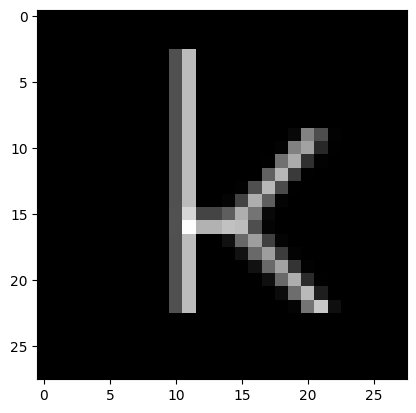

In [18]:
import matplotlib.pyplot as plt
plt.imshow(pic0,cmap="gray")
print("true label is :",y[r_num])
plt.show()

In [19]:
#number of classes
y.nunique()

26

In [20]:
# one hot encoding on labels
onh_enc= OneHotEncoder()
yval = y.values.reshape(-1,1)
y = onh_enc.fit_transform(yval).toarray()

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
reg = tf.keras.regularizers.L2(0.0001)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=784,activation="relu",input_shape=(784,),name="input_layer",kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.22))
model.add(tf.keras.layers.Dense(units=784,activation="relu",name="hidden_layer0",kernel_regularizer=reg))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(units=784,activation="relu",name="hidden_layer1",kernel_regularizer=reg))
model.add(tf.keras.layers.Dropout(0.22))
model.add(tf.keras.layers.Dense(units=26,activation="softmax",name="output_layer",kernel_regularizer=reg))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 hidden_layer0 (Dense)       (None, 784)               615440    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 26)                20410     
                                                                 
Total params: 1251290 (4.77 MB)
Trainable params: 1251290 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
opt = tf.keras.optimizers.AdamW(0.0001)
los = tf.keras.losses.CategoricalCrossentropy()
met = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=opt,loss=los,metrics=met)

In [27]:
history= model.fit(X_train,y_train,epochs=70,batch_size=700,validation_split=0.1,verbose=2)

Epoch 1/70
65/65 - 4s - loss: 28.4525 - categorical_accuracy: 0.5433 - val_loss: 4.6223 - val_categorical_accuracy: 0.8650 - 4s/epoch - 57ms/step
Epoch 2/70
65/65 - 3s - loss: 6.4123 - categorical_accuracy: 0.7988 - val_loss: 2.6408 - val_categorical_accuracy: 0.8943 - 3s/epoch - 42ms/step
Epoch 3/70
65/65 - 3s - loss: 4.1741 - categorical_accuracy: 0.8361 - val_loss: 1.8872 - val_categorical_accuracy: 0.9147 - 3s/epoch - 41ms/step
Epoch 4/70
65/65 - 3s - loss: 3.1346 - categorical_accuracy: 0.8584 - val_loss: 1.5075 - val_categorical_accuracy: 0.9267 - 3s/epoch - 41ms/step
Epoch 5/70
65/65 - 3s - loss: 2.4507 - categorical_accuracy: 0.8753 - val_loss: 1.2738 - val_categorical_accuracy: 0.9355 - 3s/epoch - 41ms/step
Epoch 6/70
65/65 - 3s - loss: 2.0365 - categorical_accuracy: 0.8858 - val_loss: 1.1410 - val_categorical_accuracy: 0.9363 - 3s/epoch - 42ms/step
Epoch 7/70
65/65 - 3s - loss: 1.7358 - categorical_accuracy: 0.8937 - val_loss: 0.9878 - val_categorical_accuracy: 0.9399 - 3s/ep

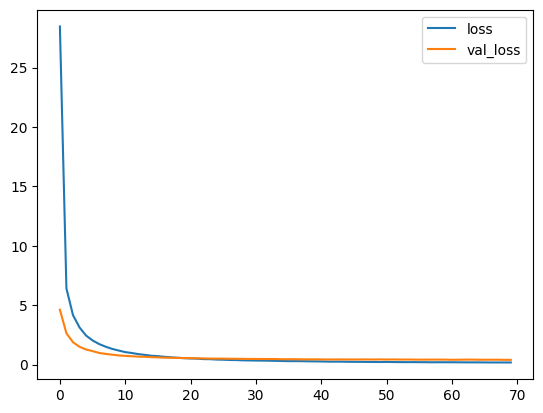

In [35]:
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "val_loss")
plt.legend()
plt.show()

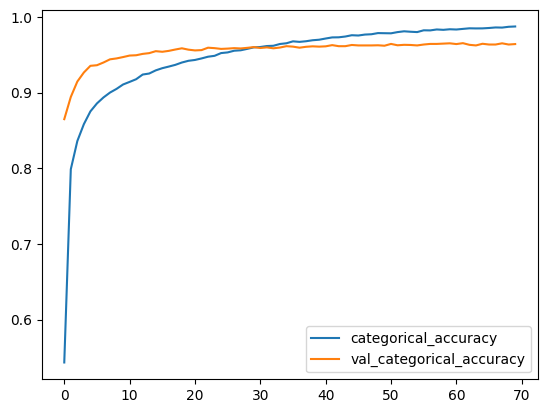

In [29]:
plt.plot(history.history['categorical_accuracy'],label = "categorical_accuracy")
plt.plot(history.history['val_categorical_accuracy'],label = "val_categorical_accuracy")
plt.legend()
plt.show()

in specific range...(zooming):


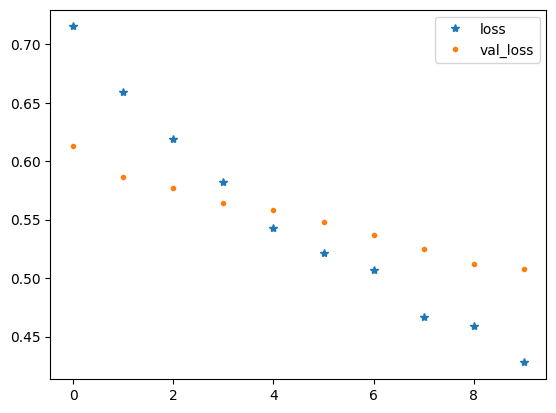

In [41]:
print("in specific range...(zooming):")
plt.plot(history.history['loss'][15:25],'*',label = "loss")
plt.plot(history.history['val_loss'][15:25],".",label = "val_loss")
plt.legend()
plt.show()

In [34]:
for k in history.history.keys():
    print(f"{k}:",history.history[k][3])


loss: 3.134577989578247
categorical_accuracy: 0.8584046959877014
val_loss: 1.5074905157089233
val_categorical_accuracy: 0.926702618598938
